<a href="https://colab.research.google.com/github/diegofescg/TalentoTech/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto** **Final -** **Detección de riesgo de crédito**

En el presente notebook se va a estudiar la información de un dataset con información financiera para poder determinar un modelo que permita detectar el riesgo creditício y finalmente poder crear un modelo para determinar si un cliente tiene probabilidad de incumplimiento o mora.

**Nombre del proyecto:**

Detección de riesgo de crédito.

**Objetivo general:**

* Crear un modelo que permita analizar, detectar y minimizar el riesgo crediticio.

**Objetivos específicos:**

* Analizar datos financieros.
* Definir las variables que podrían indicar riesgos de crédito.
* Implementar modelos predictivos utilizando las técnicas necesarias para identificar posibles casos.

El dataset ha sido descargado de Kaggle para poder llevar a cabo el siguiente ejercicio práctico y sus columnas de forma general, contiene la siguiente información:

*   BAD: 1 = candidato con préstamo incumplido o con mora; 0 = candidato que paga su deuda y no tiene registro negativo.
*   LOAN: Monto de solicitud de préstamo.
*   MORTDUE: Monto adeudado de la hipoteca existente.
*   VALUE: Valor actual del bien o propiedad.
*   REASON: DebtCon = consolidación de la deuda; HomeImp = mejoras para el hogar.
*   JOB: Categorias ocupacionales o profesionales.
*   YOJ: Años en su trabajo actual.
*   DEROG: Número de informes derogados o cancelados importantes.
*   DELINQ: Número de lineas de crédito morosas.
*   CLAGE: Antiguedad de la linea de crédito más antigua en meses.
*   NINQ:Número de consultas crediticias recientes.
*   CLNO: Número de líneas de crédito.

https://www.kaggle.com/code/raimar/riesgo-criditicio/notebook

El proyecto quedará alojado en el siguiente repositorio de GitHub, en la carpeta "Proyecto Final"

* https://github.com/diegofescg/TalentoTech.git

URL del video acerca del proyecto:

* https://youtu.be/OlUT5e7fZqY

**Bootcamp: Análisis de Datos - Innovador G1.**

**Estudiante: Diego Escobar.**

# **1. Importación de las biliotecas necesarias**

In [1]:
#Importando las librerias necesarias para el proceso ETL del proyecto.
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

# **2. Carga de datos**

In [2]:
#Importanto el dataset del proyecto, previamente descargado y guardado en Drive para un acceso más ágil.

from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo CSV en Google Drive
file_path = 'https://drive.google.com/uc?id=1Nw8R9VLsIp4aNBoyl5njbZgVECHCZCL_'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)
df

Mounted at /content/drive


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#print(df)

# **3. Explorando los datos**

In [4]:
#Explorando la información general del dataset, como el número de columnas, cantidad de registros y el tipo de dato en cada variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
#Explorando los datos de manera general
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,3359.000000,5900.000000,16300.000000,23300.000000,30500.00000,60869.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,7855.400000,18232.400000,65019.000000,91488.000000,130280.30000,232230.410000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,26262.200000,39050.700000,89235.500000,119824.250000,175094.40000,289962.800000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,0.000000,0.000000,7.000000,13.000000,21.00000,30.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,5.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,30.242642,68.912654,173.466667,231.562278,295.71588,399.544930,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,0.000000,1.000000,2.000000,3.00000,8.510000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,0.000000,7.000000,20.000000,26.000000,34.00000,50.000000,71.000000


In [6]:
#Explorando las variables aleatorias
df.describe(include=["number"])

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [7]:
# Describiendo los objetos
df.describe(include=['object'])

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [8]:
#Determinando la cantidad de registros nulos por columna.
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
#Determinando los valores cero en cada columna
valores_cero_por_columna = (df == 0).sum()

# Imprime el resultado
print("Valores cero por columna:")
print(valores_cero_por_columna)

Valores cero por columna:
BAD        4771
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ         415
DEROG      4527
DELINQ     4179
CLAGE         2
NINQ       2531
CLNO         62
DEBTINC       0
dtype: int64


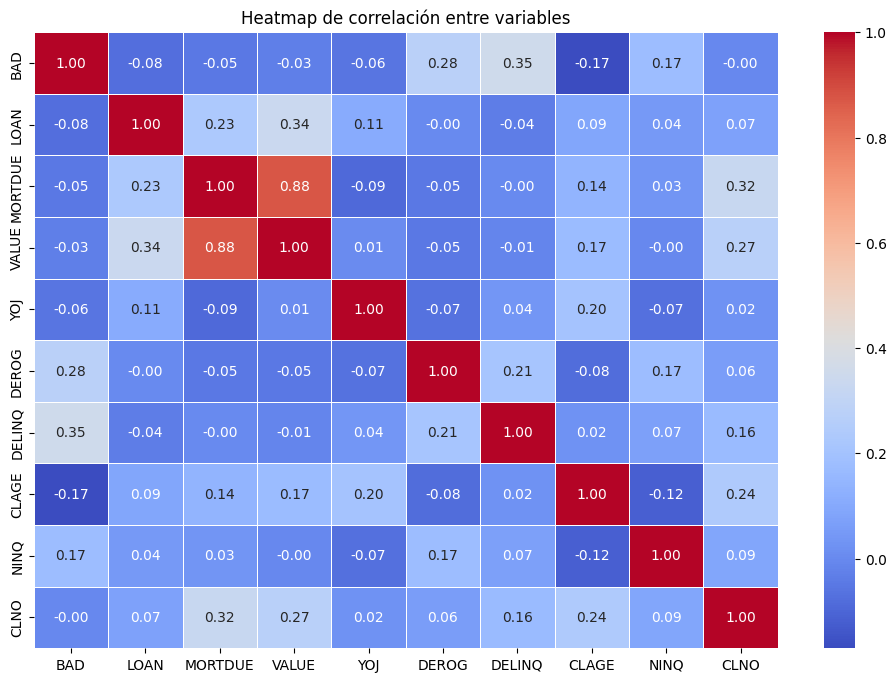

In [10]:
# Seleccionar las variables numéricas para calcular la correlación
numeric_cols = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']

# Calcular la matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de correlación entre variables')
plt.show()

# **4. Preprocesando los datos**

In [11]:
# Creando un gráfico de datos faltantes para conocer cuantos valores incompletos hay en el conjunto de datos
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [12]:
# Plotting
missing_plot(df, 'BAD')

In [13]:
# revisando los datos faltantes en forma de tabla (missing columns)
def missing_percent(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)

        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})

        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_columns

miss_cols_info = missing_percent(df)
miss_cols_info

Your selected dataframe has 13 columns.
There are 11 columns that have missing values.


,Missing Values,Percent of Total Values
DEBTINC,1267,21.26
DEROG,708,11.88
DELINQ,580,9.73
MORTDUE,518,8.69
YOJ,515,8.64
NINQ,510,8.56
CLAGE,308,5.17
JOB,279,4.68
REASON,252,4.23
CLNO,222,3.72


In [14]:
# Eliminando columnas con mas del 25% de datos faltantes
drop_cols = miss_cols_info[miss_cols_info['Percent of Total Values'] > 20]
drop_cols
# En este caso se elimina la columna DEBTINC, ya que tienen muchos datos faltantes y no tiene relevancia para el desarrollo del modelo.

,Missing Values,Percent of Total Values
DEBTINC,1267,21.26


In [15]:
df_knn = df.copy()
df_knn = df_knn.filter(['DEROG','DELINQ','MORTDUE','YOJ','NINQ','CLAGE','CLNO', 'VALUE'], axis=1).copy()
df_knn.head()

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

df_knn_imputed.head()

,DEROG,DELINQ,MORTDUE,YOJ,NINQ,CLAGE,CLNO,VALUE
0,0.000000,0.000000,0.059869,0.256098,0.058824,0.080777,0.126761,0.036590
1,0.000000,0.133333,0.171050,0.170732,0.000000,0.104289,0.197183,0.071234
2,0.000000,0.000000,0.028773,0.097561,0.058824,0.127942,0.140845,0.010261
3,0.025457,0.029963,0.180378,0.217616,0.069768,0.153879,0.299945,0.110597
4,0.000000,0.000000,0.240856,0.073171,0.000000,0.079893,0.197183,0.122655


In [16]:
imputed_columns = df_knn_imputed.columns
original_columns = df.columns

# Encontrar las columnas no imputadas
non_imputed_columns = original_columns.difference(imputed_columns)

# Crear un DataFrame con las columnas no imputadas del dataset original
df_non_imputed = df[non_imputed_columns]

# Combinar los DataFrames
df_complete = pd.concat([df_non_imputed, df_knn_imputed], axis=1)

# Mostrar información del DataFrame completo
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   DEBTINC  4693 non-null   float64
 2   JOB      5681 non-null   object 
 3   LOAN     5960 non-null   int64  
 4   REASON   5708 non-null   object 
 5   DEROG    5960 non-null   float64
 6   DELINQ   5960 non-null   float64
 7   MORTDUE  5960 non-null   float64
 8   YOJ      5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLAGE    5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  VALUE    5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Aquí se unieron los datos imputados juntos con el resto del dataset original, para continuar trabajando con el modelo de regresión que se planteó.

In [17]:
original_data = scaler.inverse_transform(df_knn_imputed)
# Convert the original data to a DataFrame
df_original = pd.DataFrame(original_data, columns=df_knn.columns)

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEROG    5960 non-null   float64
 1   DELINQ   5960 non-null   float64
 2   MORTDUE  5960 non-null   float64
 3   YOJ      5960 non-null   float64
 4   NINQ     5960 non-null   float64
 5   CLAGE    5960 non-null   float64
 6   CLNO     5960 non-null   float64
 7   VALUE    5960 non-null   float64
dtypes: float64(8)
memory usage: 372.6 KB


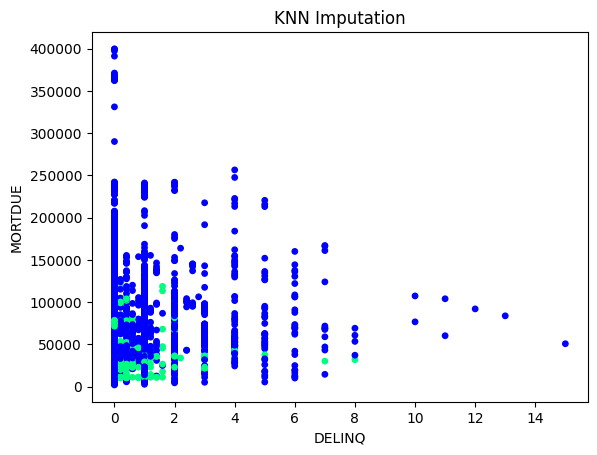

In [18]:
fig = plt.Figure()
null_values = df['MORTDUE'].isnull()
fig = df_original.plot(x='DELINQ', y='MORTDUE', kind='scatter',
                          c=null_values, cmap='winter', s = 15,
                          title='KNN Imputation', colorbar=False)

Text(0.5, 1.0, 'KNN Imputation')

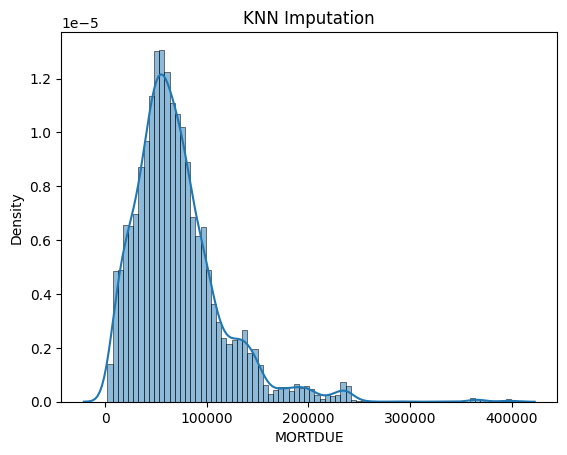

In [19]:
sns.histplot(
    df_original["MORTDUE"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('KNN Imputation')

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



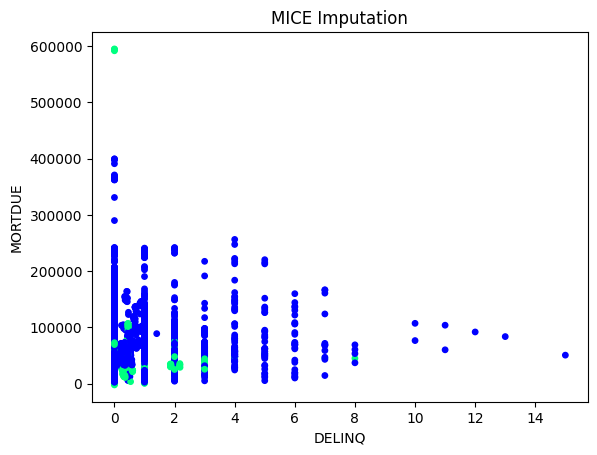

In [20]:
df_mice = df.copy()
df_mice = df.filter(['DEROG','DELINQ','MORTDUE','YOJ','NINQ','CLAGE', 'CLNO', 'VALUE'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

fig = plt.Figure()
null_values = df['MORTDUE'].isnull()
fig = df_mice_imputed.plot(x='DELINQ', y='MORTDUE', kind='scatter',
                           c=null_values, cmap='winter', s = 15,
                           title='MICE Imputation', colorbar=False)

Text(0.5, 1.0, 'MICE Imputation')

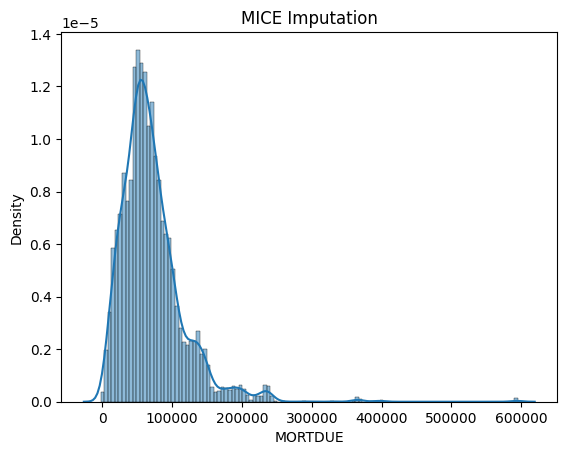

In [21]:
sns.histplot(
    df_mice_imputed["MORTDUE"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('MICE Imputation')

Para la continuacion del análisis se procedera a trabajar con la imputación KNN (K-Nearest Neighbors), debido a que entre sus ventajas se tiene que se puede aplicar a datasets que no sean tan amplios y que sus variables manejen una fuerte correlación entre ellas como se puedo evidenciar en el mapa de correlación anterior.

In [22]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   DEBTINC  4693 non-null   float64
 2   JOB      5681 non-null   object 
 3   LOAN     5960 non-null   int64  
 4   REASON   5708 non-null   object 
 5   DEROG    5960 non-null   float64
 6   DELINQ   5960 non-null   float64
 7   MORTDUE  5960 non-null   float64
 8   YOJ      5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLAGE    5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  VALUE    5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


# **5. Dividiendo los datos para entrenamiento y prueba**

In [23]:
# X tendrá los datos de entrenamiento
X = df_complete[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']]
y = df_complete[["BAD"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (4768, 9)
Tamaño de X_test= (1192, 9)
Tamaño de y_train= (4768, 1)
Tamaño de y_test= (1192, 1)


# **6. Entrenando un modelo predictivo**

In [24]:
# Entrenando un modelo predictivo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

<ipython-input-24-5b1db5611354>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=42)

# **7. Evaluando el modelo**

In [25]:
# Evaluando el modelo
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9077181208053692
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       963
           1       0.93      0.56      0.70       229

    accuracy                           0.91      1192
   macro avg       0.92      0.78      0.82      1192
weighted avg       0.91      0.91      0.90      1192

[[953  10]
 [100 129]]


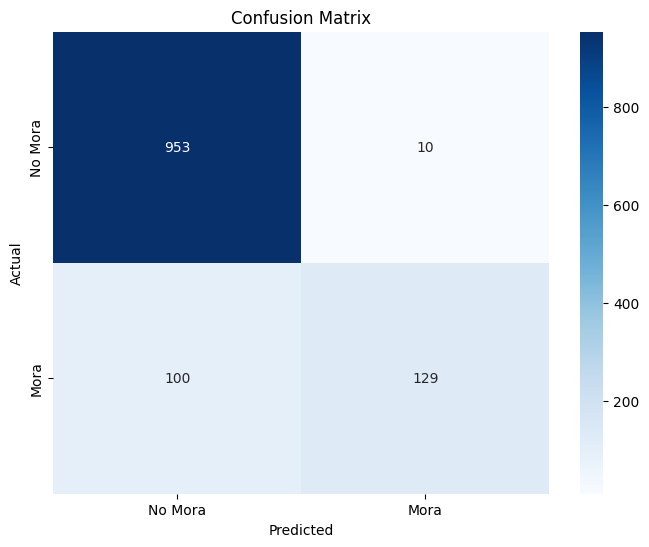

In [26]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mora', 'Mora'], yticklabels=['No Mora', 'Mora'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Interpretando los resulados:

*   No Mora: El modelo es bueno prediciendo correctamente los que no tienen mora (953 correctos contra solo 8 incorrectos).
*   Mora: El modelo es menos preciso prediciendo a las personas que tienen mora (130 correctos contra 101 incorrectos).

In [27]:
# Descomponemos la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# Exactitud (Accuracy)
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy: {accuracy:.2f}')

# Precisión (Precision)
precision = TP / (TP + FP)
print(f'Precision: {precision:.2f}')

# Exhaustividad (Recall)
recall = TP / (TP + FN)
print(f'Recall: {recall:.2f}')

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1_score:.2f}')

Accuracy: 0.91
Precision: 0.93
Recall: 0.56
F1-Score: 0.70


# **Interpretación de las Métricas:**

*   **Accuracy (Exactitud)**: La proporción de predicciones correctas sobre el total de predicciones. En este caso, la exactitud fue de aproximadamente 0.91, lo que significa que el 91% de las predicciones del modelo fueron correctas.
*   **Precision (Precisión)**: La proporción de predicciones positivas correctas sobre el total de predicciones positivas. Una precisión alta indica que pocos de los casos positivos predichos son falsos, para este caso fue de 93%.
*   **Recall (Exhaustividad)**: La proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Una exhaustividad alta indica que el modelo identifica la mayoría de los casos positivos reales, para este caso fue de 56%.
*   **F1-Score**: Media armónica de la precisión y la exhaustividad, con un valor de 70%, lo que indica un buen equilibrio entre precisión y recall.

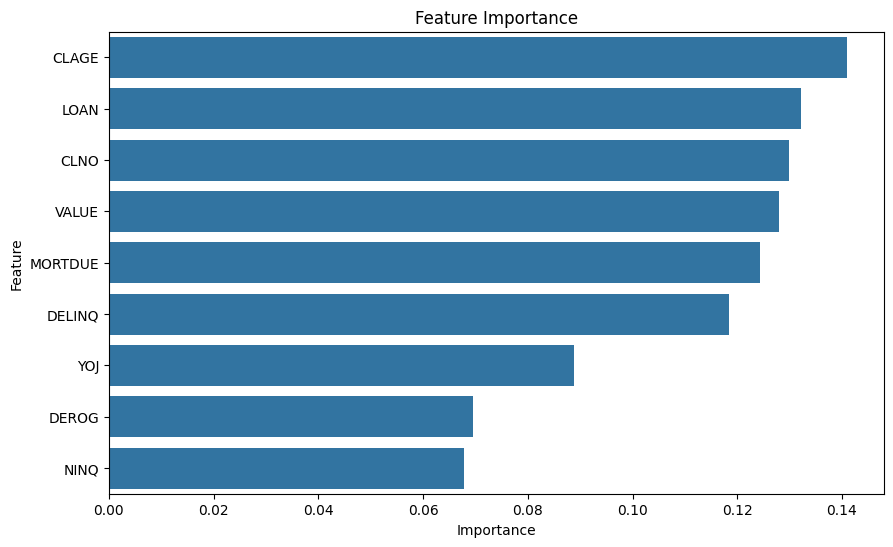

In [28]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizarlo
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Interpretación:

*   CLAGE (0.145): La antigüedad de la línea de crédito más antigua es la característica más importante.
*   LOAN (0.135): El monto de la solicitud de préstamo tiene una importancia considerable.
*   VALUE (0.123): El valor actual del bien o propiedad es la característica más importante. Esto significa que esta variable tiene la mayor influencia en la predicción de si un candidato incumplirá el préstamo.
*   CLNO, MORTDUE, DELINQ, YOJ: Estas variables tienen menos influencia comparadas con las anteriores, pero aún contribuyen a la predicción del modelo.

#  **8. En conclusión**

Matriz de Confusión:


*   El modelo es muy bueno para predecir correctamente quién no tendrá mora (953 correctos y solo 8 incorrectos).
*   El modelo es menos preciso para predecir quién tendrá mora (141 correctos y 95 incorrectos).

Importancia de las Características:


*   Las características más importantes para el modelo son CLAGE, LOAN Y VALUE.
*   Estas características tienen la mayor influencia en la predicción de la mora.
*   Otras características como YOJ, DEROG, y NINQ también son relevantes pero en menor medida.

Este proyecto demuestra cómo un enfoque sistemático de preprocesamiento de datos, imputación y modelado predictivo puede proporcionar una herramienta eficaz para la evaluación del riesgo crediticio. La precisión del modelo y las métricas derivadas indican que el modelo Random Forest es adecuado para predecir la probabilidad de incumplimiento de los solicitantes de préstamos, ayudando así a las instituciones financieras a tomar decisiones más informadas y gestionar el riesgo de manera más efectiva.



##  **9. Bibliografía**

Para llevar a cabo este proyecto final, se ha recurrido a proyectos realizados durante el curso, motivo por el cual se ha empleado codigo ya utilizaado y que fue de gran ayuda para poder terminar el trabajo.

A continuación se listara las funcionalidades de cada codigo y su fuente de origen:

* Análisis exploratorio de datos: https://colab.research.google.com/drive/1UbzrNOGsBNtPuuLTdzpmJoGjh_16p3bN


* Imputación de datos: https://colab.research.google.com/drive/1qfJZYyk5CSgwMJlGab97cl88XRdeuaRZ


* Regresión: https://colab.research.google.com/drive/1QRGw1dkBhHKfchqsmOsIuAJg0vPz21ri



Támbien se empleo código proporcionadno por ChatGPT y que fue solicitado mediante los siguientes prompts:


* Prompt: "Eres un experto analista de datos en áreas financieras, asesorame para elegir que variables debo tener en cuenta para determinar el riesgo crediticio."
Respuesta: Análisis de datos financieros y variables relevantes para el riesgo crediticio. ChatGPT, OpenAI. (2024).

* Prompt: "Como usarias esas variables en un modelo predictivo que identifique los candidatos con mayor probabilidad de incumplimiento o mora."
Respuesta: Implementación de un modelo predictivo para identificar candidatos con riesgo de incumplimiento. ChatGPT, OpenAI. (2024).

* Prompt: "Por favor, podrías darme los codigos de como calcular cada una de estas métricas derivadas que me proporcionaste?"
Respuesta: Cálculo de métricas de evaluación (precisión, exhaustividad, F1-score, exactitud) en modelos de clasificación. ChatGPT, OpenAI. (2024).
